### Using the dataset to train a model

In [1]:
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# neural neworks
import tensorflow.keras as kr

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<AxesSubplot:xlabel='speed', ylabel='power'>

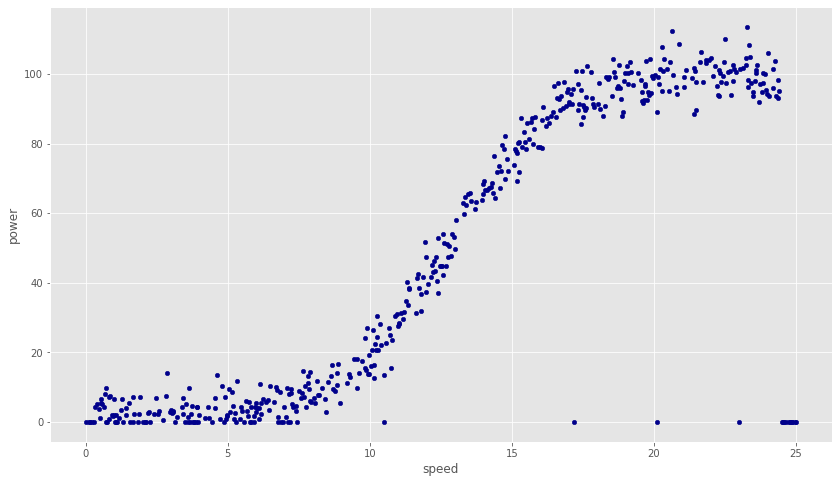

In [3]:
data = pd.read_csv('power_production.csv')
data.plot.scatter(x='speed',
                      y='power',
                      c='DarkBlue')

<AxesSubplot:xlabel='speed', ylabel='power'>

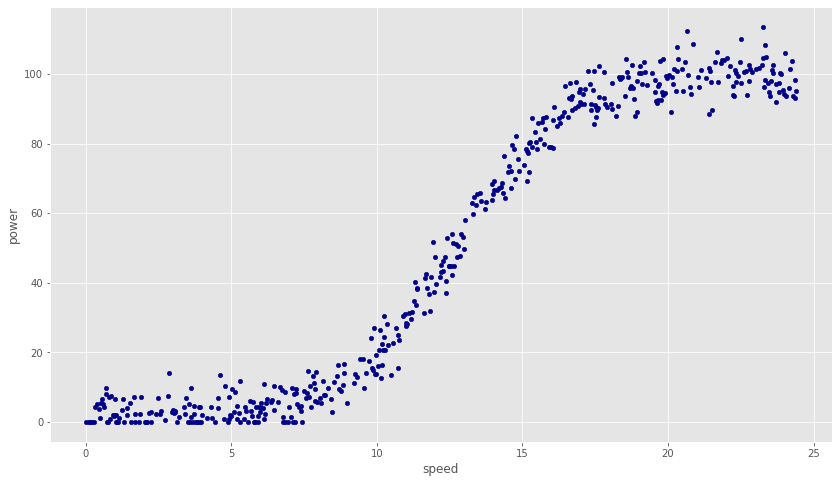

In [4]:
data = pd.read_csv('power_production.csv')
## drop rows where the power putput is zero even though wind speed > 10
df_new = data.drop(data[(data['speed'] > 10.0) & (data['power'] == 0.0)].index)   # https://stackoverflow.com/questions/52456874/drop-rows-on-multiple-conditions-in-pandas-dataframe
df_new.plot.scatter(x='speed',
                      y='power',
                      c='DarkBlue')

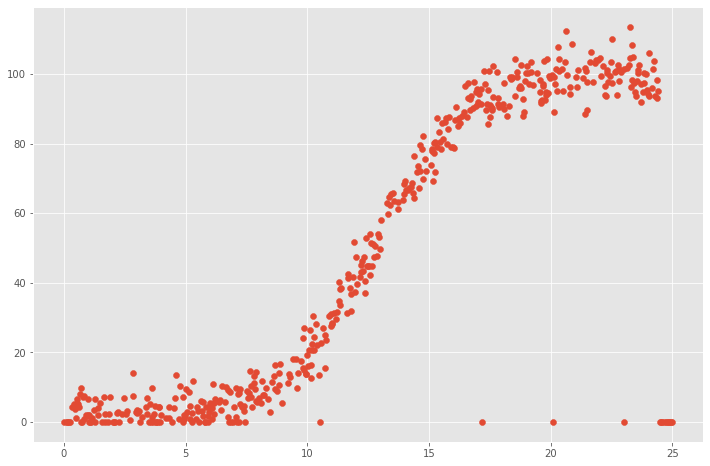

In [5]:
power_data = np.genfromtxt("power_production.csv", delimiter=",", names=["x", "y"])
fig=plt.figure(figsize=(12,8))  # adapted from https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
plt.scatter(power_data['x'], power_data['y'])


The curve produced by plotting wind-speed against power output is s-shaped. This suggests that power output is quite small at low wind speeds, climbs sharply after a certain speed and then much more slowly before it reaches a maximum. The characteristic shape of the graph is explained by [this article](https://now.tufts.edu/articles/how-do-windmills-create-electricity) on how windmills create energy. It seems that if the turbine is moving quite slowly, electricity is not creatyed. Energy starts to be created at what is known as the cut-in speed/ After the cut-in point energy is created at a fast rate but this rate starts to slow until it reaches its maximum rated wins speed. SAbove this point, the power output remains constant. We can see this as the top of the s-shape in the graph. Wind turbines also have a cut-out speed, at which a brake stops the winds rotation. I wonder if some of the zero value power outputs we see can be explained by problems caused by high wind speed.
[https://now.tufts.edu/articles/how-do-windmills-create-electricity]

## S-shaped curves

I'm struck by the shape of the curve produce by the relationship between wind speed and power output, the related sigmoid function and the mechanism of firing neurons as described in the lectures on neural networks. The way that neurons need a build up of signals before firing strikes me as similar to the way the wind turbines have a cut-in speed, after which they start to produce electricity. The sigmoid function is described in the lectures as like an on/off switch. Is there a relationship between the activation function and thr function needed to describe the power output from wind turbines?
[https://en.wikipedia.org/wiki/Sigmoid_function]

In [6]:
train = pd.DataFrame()
msk = np.random.rand(len(df_new)) < 0.8
train = df_new[msk]
test = df_new[~msk]
train_x = train.iloc[:,0]
train_x
train_y = train.iloc[:,1]
train_y
test_x = test.iloc[:,0]
test_x
test_y = test.iloc[:,1]
test_y
# https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

2        0.000
4        0.000
12       4.220
14       9.746
18       0.795
        ...   
455    100.549
459    102.462
462     96.337
474     96.986
477    100.322
Name: power, Length: 78, dtype: float64

In [7]:
# Train a model.
m = kr.models.Sequential()
m.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [8]:
# Fit the data.
m.fit(train_x, train_y, epochs=500, batch_size=10)

Epoch 1/500
41/41 [==============================] - 0s 1ms/step - loss: 4334.8301
Epoch 2/500
41/41 [==============================] - 0s 900us/step - loss: 4173.6055
Epoch 3/500
41/41 [==============================] - 0s 657us/step - loss: 3989.9978
Epoch 4/500
41/41 [==============================] - 0s 632us/step - loss: 3785.5994
Epoch 5/500
41/41 [==============================] - 0s 657us/step - loss: 3571.0698
Epoch 6/500
41/41 [==============================] - 0s 876us/step - loss: 3380.1357
Epoch 7/500
41/41 [==============================] - 0s 973us/step - loss: 3220.6069
Epoch 8/500
41/41 [==============================] - 0s 1ms/step - loss: 3076.4175
Epoch 9/500
41/41 [==============================] - 0s 827us/step - loss: 2942.4785
Epoch 10/500
41/41 [==============================] - 0s 1ms/step - loss: 2821.3086
Epoch 11/500
41/41 [==============================] - 0s 973us/step - loss: 2713.9656
Epoch 12/500
41/41 [==============================] - 0s 778us/step -

41/41 [==============================] - 0s 2ms/step - loss: 132.1655
Epoch 98/500
41/41 [==============================] - 0s 1ms/step - loss: 128.6428
Epoch 99/500
41/41 [==============================] - 0s 1ms/step - loss: 124.7910
Epoch 100/500
41/41 [==============================] - 0s 1ms/step - loss: 121.8609
Epoch 101/500
41/41 [==============================] - 0s 1ms/step - loss: 118.4312
Epoch 102/500
41/41 [==============================] - 0s 1ms/step - loss: 116.0341
Epoch 103/500
41/41 [==============================] - 0s 1ms/step - loss: 112.9811
Epoch 104/500
41/41 [==============================] - 0s 1ms/step - loss: 109.6950
Epoch 105/500
41/41 [==============================] - 0s 1ms/step - loss: 106.9235
Epoch 106/500
41/41 [==============================] - 0s 1ms/step - loss: 104.4070
Epoch 107/500
41/41 [==============================] - 0s 924us/step - loss: 102.1192
Epoch 108/500
41/41 [==============================] - 0s 1ms/step - loss: 99.8011
Epoch 1

41/41 [==============================] - 0s 754us/step - loss: 43.5829
Epoch 194/500
41/41 [==============================] - 0s 657us/step - loss: 42.9746
Epoch 195/500
41/41 [==============================] - 0s 681us/step - loss: 42.6321
Epoch 196/500
41/41 [==============================] - 0s 803us/step - loss: 43.2125
Epoch 197/500
41/41 [==============================] - 0s 778us/step - loss: 42.1336
Epoch 198/500
41/41 [==============================] - 0s 730us/step - loss: 41.5537
Epoch 199/500
41/41 [==============================] - 0s 730us/step - loss: 41.1128
Epoch 200/500
41/41 [==============================] - 0s 681us/step - loss: 40.8028
Epoch 201/500
41/41 [==============================] - 0s 730us/step - loss: 40.8585
Epoch 202/500
41/41 [==============================] - 0s 730us/step - loss: 40.2920
Epoch 203/500
41/41 [==============================] - 0s 779us/step - loss: 40.0827
Epoch 204/500
41/41 [==============================] - 0s 754us/step - loss: 39

41/41 [==============================] - 0s 705us/step - loss: 23.4712
Epoch 290/500
41/41 [==============================] - 0s 803us/step - loss: 23.2281
Epoch 291/500
41/41 [==============================] - 0s 851us/step - loss: 23.0831
Epoch 292/500
41/41 [==============================] - 0s 827us/step - loss: 23.1960
Epoch 293/500
41/41 [==============================] - 0s 778us/step - loss: 22.9766
Epoch 294/500
41/41 [==============================] - 0s 778us/step - loss: 22.8783
Epoch 295/500
41/41 [==============================] - 0s 778us/step - loss: 22.9980
Epoch 296/500
41/41 [==============================] - 0s 778us/step - loss: 22.7410
Epoch 297/500
41/41 [==============================] - 0s 754us/step - loss: 22.7875
Epoch 298/500
41/41 [==============================] - 0s 803us/step - loss: 22.7213
Epoch 299/500
41/41 [==============================] - 0s 803us/step - loss: 22.5618
Epoch 300/500
41/41 [==============================] - 0s 778us/step - loss: 22

41/41 [==============================] - 0s 657us/step - loss: 18.9412
Epoch 387/500
41/41 [==============================] - 0s 657us/step - loss: 18.9301
Epoch 388/500
41/41 [==============================] - 0s 730us/step - loss: 18.9753
Epoch 389/500
41/41 [==============================] - 0s 803us/step - loss: 18.7742
Epoch 390/500
41/41 [==============================] - 0s 827us/step - loss: 18.9476
Epoch 391/500
41/41 [==============================] - 0s 754us/step - loss: 18.7498
Epoch 392/500
41/41 [==============================] - 0s 705us/step - loss: 18.8321
Epoch 393/500
41/41 [==============================] - 0s 827us/step - loss: 18.9793
Epoch 394/500
41/41 [==============================] - 0s 876us/step - loss: 19.1898
Epoch 395/500
41/41 [==============================] - 0s 924us/step - loss: 18.8656
Epoch 396/500
41/41 [==============================] - 0s 900us/step - loss: 18.6785
Epoch 397/500
41/41 [==============================] - 0s 705us/step - loss: 18

41/41 [==============================] - 0s 730us/step - loss: 17.6360
Epoch 483/500
41/41 [==============================] - 0s 632us/step - loss: 17.9178
Epoch 484/500
41/41 [==============================] - 0s 608us/step - loss: 17.6844
Epoch 485/500
41/41 [==============================] - 0s 608us/step - loss: 17.7444
Epoch 486/500
41/41 [==============================] - 0s 632us/step - loss: 17.6006
Epoch 487/500
41/41 [==============================] - 0s 681us/step - loss: 17.6279
Epoch 488/500
41/41 [==============================] - 0s 608us/step - loss: 17.6197
Epoch 489/500
41/41 [==============================] - 0s 657us/step - loss: 17.5935
Epoch 490/500
41/41 [==============================] - 0s 632us/step - loss: 17.6559
Epoch 491/500
41/41 [==============================] - 0s 608us/step - loss: 17.6123
Epoch 492/500
41/41 [==============================] - 0s 632us/step - loss: 17.6112
Epoch 493/500
41/41 [==============================] - 0s 632us/step - loss: 17

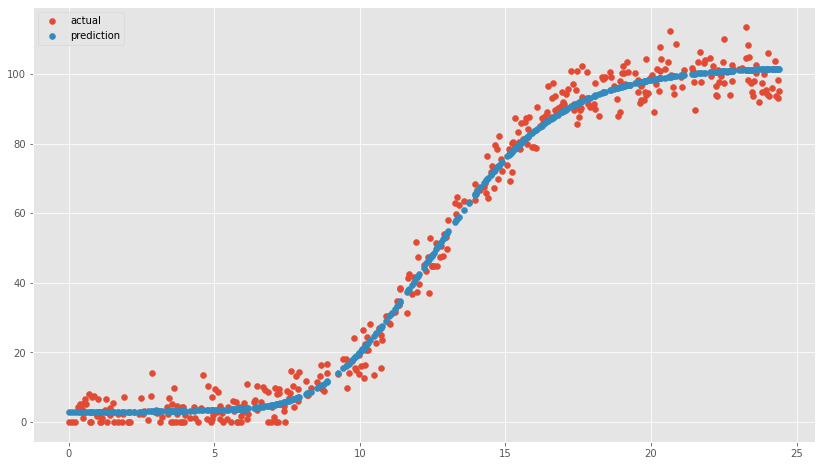

In [9]:
# Now let's see.
plt.scatter(train_x, train_y, label='actual')
plt.scatter(train_x, m.predict(train_x), label='prediction')
plt.legend();

In [11]:
# Take four hand-picked values and see their predictions.
m.predict([1.0,5.0,10.0,15.0, 20.0])

array([[ 2.8647146],
       [ 3.4429064],
       [20.101025 ],
       [75.78274  ],
       [98.28385  ]], dtype=float32)

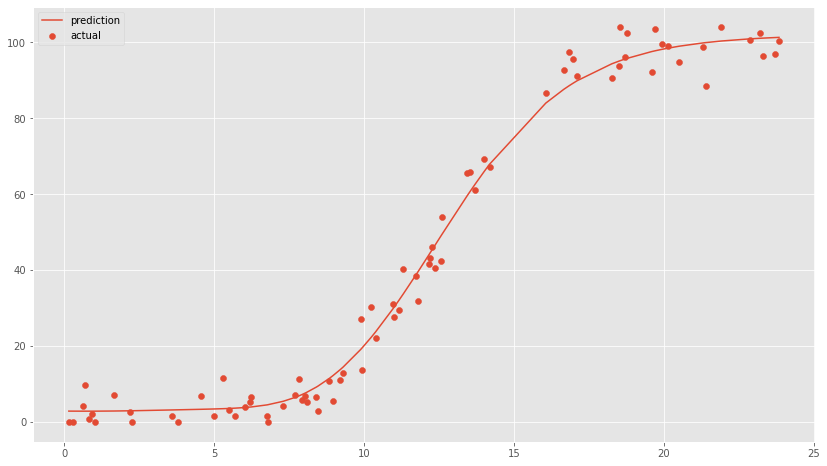

In [15]:
# Let's plot our predictions of the x values we kept for testing
plt.scatter(test_x, test_y, label='actual')
plt.plot(test_x, m.predict(test_x), label='prediction')
plt.legend();

In [16]:
# Evaluate the neural network on the test data.
m.evaluate(test_x, test_y)

3/3 [==============================] - 0s 997us/step - loss: 18.1069


18.106876373291016

### End

In [ ]:
# create a new neural network
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
# dense: everything in current layer connected to every thing in previous layer
# 1: number of neurons in the layer
# input_dim=1  number of dimensions in input is 1 (1 input)
# linear activation function
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# Compile the model.
# bog standard to optimize - optimizer="sgd"
# loss="mean_squared_error" ... cost function
m.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
# Create some input values.
x = np.arange(-10.0, 10.1, 1.0)

# Run each x value through the neural network.
y = m.predict(x)

In [ ]:
# Have a look at x.
x

In [ ]:
y